# Name Project (Twitter Sentiment Analysis)

* Column Names and The Definition

1. Tweet_UniqueID     ----->    The unique ID of each tweet
2. Entity             ----->    The names of the companies that have tweet data
3. Sentiment          ----->    The status of tweets if they are ['Positive' 'Neutral' 'Negative' 'Irrelevant']
4. Tweet_content      ----->    Text content for each tweet

In [2]:
# Important Libraries
import pandas as pd   # read csv file
import numpy as np  # linear algebra
import matplotlib.pyplot as plt  # using in data visualization
import seaborn as sns # using in data visualization
import re  # regular expression
import nltk    # work with human language data --> corpra
nltk.download('stopwords')   # install the stopword
from sklearn.metrics import accuracy_score  # calculate the accuracy 
from sklearn.metrics import precision_score # calcualte the precision
from sklearn.metrics import recall_score # calculate the recall
from sklearn.metrics import f1_score # calculate the f1-score
from sklearn.metrics import classification_report # print the details of model
from sklearn.metrics import confusion_matrix # calculate confusion matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fathy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Preprocessing Dataset

In [3]:
# Adding row names for the csv file which will be read later
Headers = ['Tweet_UniqueID','Entity','Sentiment','Tweet_content']

In [4]:
# Load The Training And Testing Dataset Using Pandas
train = pd.read_csv('twitter_training.csv' , names = Headers)
test = pd.read_csv('twitter_validation.csv' , names = Headers)

In [5]:
# Show Samples Of train dataset
train.sample(10)   

,Tweet_UniqueID,Entity,Sentiment,Tweet_content
44141,10380,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,Love.....................
51404,10422,RedDeadRedemption(RDR),Positive,This is fantastic!
32434,7564,LeagueOfLegends,Irrelevant,the constant mouse clicking is what always eve...
48586,5940,HomeDepot,Positive,C Congratulations Sandy on 6 years with Home D...
49075,6025,FIFA,Negative,@ EAHelp I have just ordered 15: 99 of the Fif...
10231,12962,Xbox(Xseries),Irrelevant,It's good.
47176,5694,HomeDepot,Negative,this is some real home of depot shit
53713,2030,CallOfDuty,Irrelevant,Happy 4th of July to the @ callofduty Nation. ...
14103,2818,Dota2,Irrelevant,thank ful reddit
48151,5866,HomeDepot,Negative,"Thank you Mobile Police Department, we appreci..."


In [6]:
# Show Number Of columns and Number of Rows
print('Count of columns in the train dataset --> ', len(train.columns))
print('Count of rows in the train dataset --> ', len(train))
print('Count of columns in the test dataset --> ', len(test.columns))
print('Count of rows in the test dataset --> ', len(test))

Count of columns in the train dataset -->  4
Count of rows in the train dataset -->  74682
Count of columns in the test dataset -->  4
Count of rows in the test dataset -->  1000


In [7]:
# Show the data type of trainind and testing dataset
print("Train Columns    Data Types\n{}\n".format(train.dtypes))
print("Test columns     Data Types\n{}".format(test.dtypes))

Train Columns    Data Types
Tweet_UniqueID     int64
Entity            object
Sentiment         object
Tweet_content     object
dtype: object

Test columns     Data Types
Tweet_UniqueID     int64
Entity            object
Sentiment         object
Tweet_content     object
dtype: object


In [8]:
# Show the Information of Training Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet_UniqueID  74682 non-null  int64 
 1   Entity          74682 non-null  object
 2   Sentiment       74682 non-null  object
 3   Tweet_content   73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
# Show the Information of Testing Dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet_UniqueID  1000 non-null   int64 
 1   Entity          1000 non-null   object
 2   Sentiment       1000 non-null   object
 3   Tweet_content   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [10]:
# sum of duplicate values in training and testing dataset
print('Number of row to duplicate value : ' , train.duplicated().sum())
print('Number of row to duplicate value : ' , test.duplicated().sum())

Number of row to duplicate value :  2700
Number of row to duplicate value :  0


In [11]:
# drop the duplicate of dataset
train = train.drop_duplicates()

In [12]:
# Check the missing value in dataset
train.isna().sum()

Tweet_UniqueID      0
Entity              0
Sentiment           0
Tweet_content     326
dtype: int64

In [13]:
# Check the missing value in dataset
test.isna().sum()

Tweet_UniqueID    0
Entity            0
Sentiment         0
Tweet_content     0
dtype: int64

In [14]:
# drop all null value from tweet_content
train.dropna(axis=0, inplace=True)

In [15]:
# Show the Unique value and Number in the label called Sentiment
print('Number of Value of label --> ' , train['Sentiment'].nunique())
print('Unique Value in label --> ' , train['Sentiment'].unique())

Number of Value of label -->  4
Unique Value in label -->  ['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [16]:
# Removing neutral and Irrelevant sentiments 
train = train[train['Sentiment'] != "Neutral"]
train = train[train['Sentiment'] != "Irrelevant"]
test = test[test['Sentiment'] != "Neutral"]
test = test[test['Sentiment'] != "Irrelevant"]

In [17]:
# Show the number of Negative and Neutral and Positive
print("Count The Value in Training dataset \n{}\n".format(train['Sentiment'].value_counts()))
print("Count The Value in Testing dataset \n{}".format(test['Sentiment'].value_counts()))

Count The Value in Training dataset 
Negative    21698
Positive    19713
Name: Sentiment, dtype: int64

Count The Value in Testing dataset 
Positive    277
Negative    266
Name: Sentiment, dtype: int64


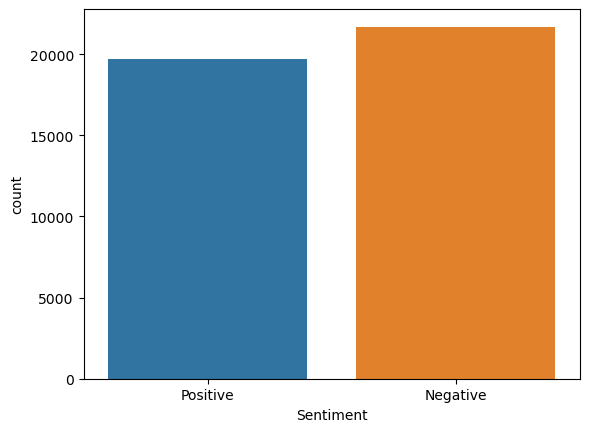

In [18]:
sns.countplot(x = 'Sentiment' , data = train);

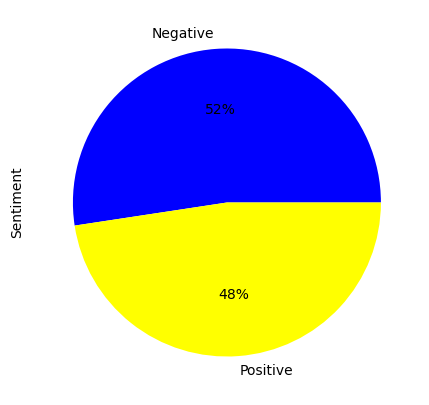

In [19]:
# pie chart using seaborn based on total count of different sentiments in training dataset 
train.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(5,5),colors=["blue", "yellow"]);

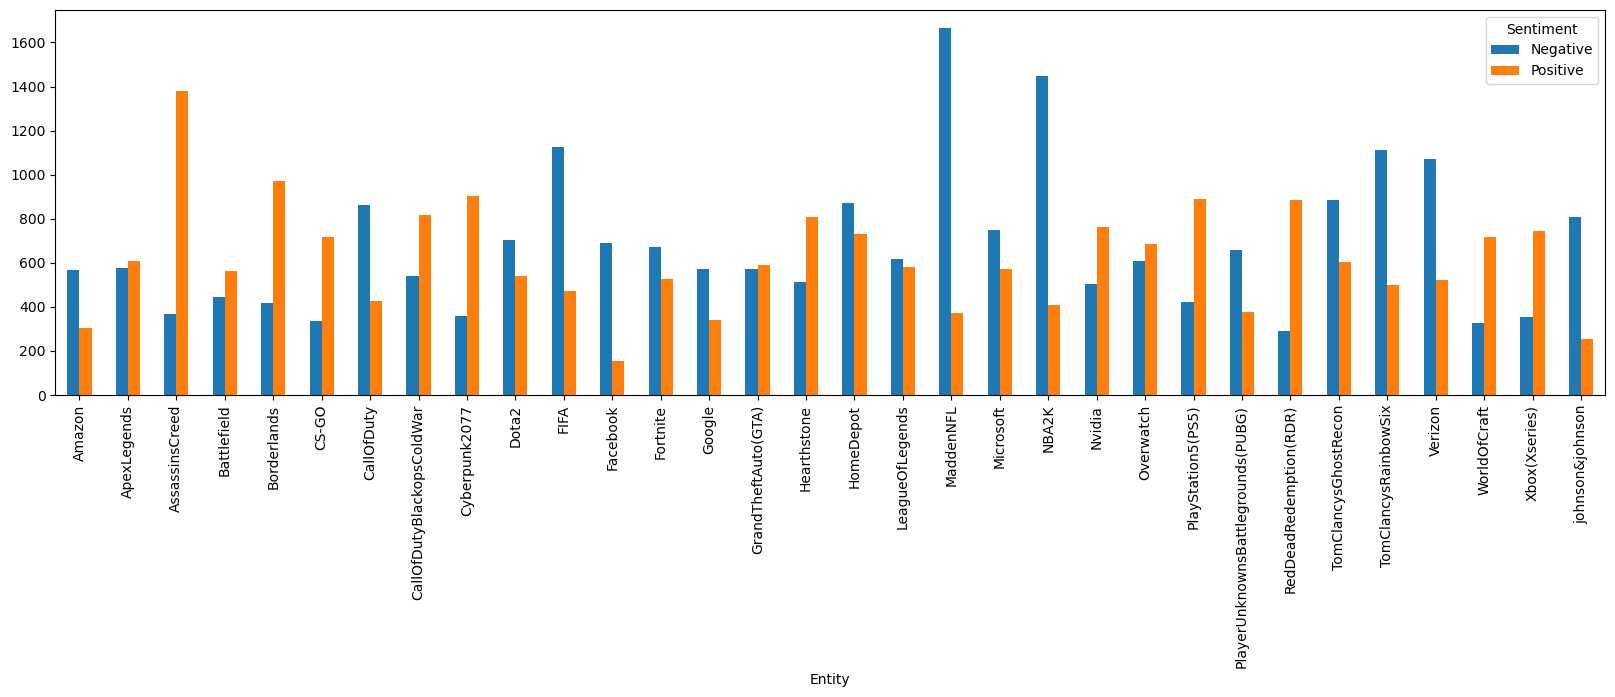

In [20]:
# entity vs sentiment relation 
Twitter_sentiment = train.groupby(['Entity', 'Sentiment']).Sentiment.count().unstack()
Twitter_sentiment.plot(kind='bar',figsize=(20,5));

In [21]:
# # Encoder For Labels 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# converting string based sentiments into numeric valuye which can be further used for training ML algorithm
train['Sentiment'] = label_encoder.fit_transform(train['Sentiment'])
test['Sentiment'] = label_encoder.fit_transform(test['Sentiment'])

In [22]:
#get train and test target variables
y_train = train["Sentiment"]
y_test = test["Sentiment"]

# Preprocessing Sentence

In [23]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: lookup_dict(x,apostrophe_dict))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: lookup_dict(x,apostrophe_dict))

In [24]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: lookup_dict(x,short_word_dict))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: lookup_dict(x,short_word_dict))

In [25]:
train['Tweet_content'] = train['Tweet_content'].str.lower()
test['Tweet_content'] = test['Tweet_content'].str.lower()

In [26]:
def cleaning_Links(data):
    return re.sub(r'https?://\S+|www\.\S+',' ',data)
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: cleaning_Links(x))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: cleaning_Links(x))

In [27]:
def cleaning_Html_tage(data):
    return re.sub(r'<[^>]+>',' ',data) 
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: cleaning_Html_tage(x))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: cleaning_Html_tage(x))

In [28]:
# def cleaning_numbers(data):
#     return re.sub('[0-9]+', '', data)
# train['Tweet_content'] = train['Tweet_content'].apply(lambda x: cleaning_numbers(x))
# test['Tweet_content'] = test['Tweet_content'].apply(lambda x: cleaning_numbers(x))

In [29]:
def cleaning_special_char(data):
    return re.sub(r'[^\w\s]+' , '', data)
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: cleaning_special_char(x))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: cleaning_special_char(x))

In [30]:
#remove newlines, tabs, and carriage returns
def cleaning_NTC(data):
    return re.sub(r'(\r\n|\n|\r|\t)+' , '', data)
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: cleaning_NTC(x))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: cleaning_NTC(x))

In [31]:
#remove multiple space characters
def cleaning_MSC(data):
    return re.sub(r'(\s{2,}' , '', data)
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: cleaning_NTC(x))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: cleaning_NTC(x))

In [32]:
from nltk.corpus import stopwords
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: [word for word in x if not word in stop_words])
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: [word for word in x if not word in stop_words])

In [33]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
train['Tweet_content'] = train['Tweet_content'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
test['Tweet_content'] = test['Tweet_content'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))

In [34]:
# # Importing library for lemmatizing
# from nltk.stem.wordnet import WordNetLemmatizer
# lemmatizing = WordNetLemmatizer()
# # Created one more columns tweet_lemmatized it shows tweets' lemmatized version
# train['Tweet_content'] = train['Tweet_content'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
# test['Tweet_content'] = test['Tweet_content'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

In [35]:
# drop the columns called Tweet_UniqueID and Entity
train = train.drop(['Tweet_UniqueID'] , axis = 1)
train = train.drop(['Entity'] , axis = 1)
test = test.drop(['Tweet_UniqueID'] , axis = 1)
test = test.drop(['Entity'] , axis = 1)

In [36]:
train.isna().sum()

Sentiment        0
Tweet_content    0
dtype: int64

In [37]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(
    num_words = 8000,
)
# using Tokenizer method converting training tweets data to 3000 features
tokenizer.fit_on_texts(train['Tweet_content'])
x_train = tokenizer.texts_to_sequences(train['Tweet_content'])
x_train = pad_sequences(x_train, maxlen = 3000)
# using Tokenizer method converting validation tweets data to 3000 features
tokenizer.fit_on_texts(test['Tweet_content'])
x_test = tokenizer.texts_to_sequences(test['Tweet_content'])
x_test = pad_sequences(x_test, maxlen = 3000)

# Models And Evaluate 

# Decision Tree Classifier

DecisionTreeClassifier Train Score:  0.9840622056941393
DecisionTreeClassifier Test Score:  0.8931860036832413
Accuracy Score: 0.8931860036832413
Recall Socer: 0.8938886023723569
Precision scoer: 0.8948532012734347
F1 score: 0.8931566520110732
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       266
           1       0.93      0.86      0.89       277

    accuracy                           0.89       543
   macro avg       0.89      0.89      0.89       543
weighted avg       0.90      0.89      0.89       543

Confusion Matrix: 
 [[247  19]
 [ 39 238]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


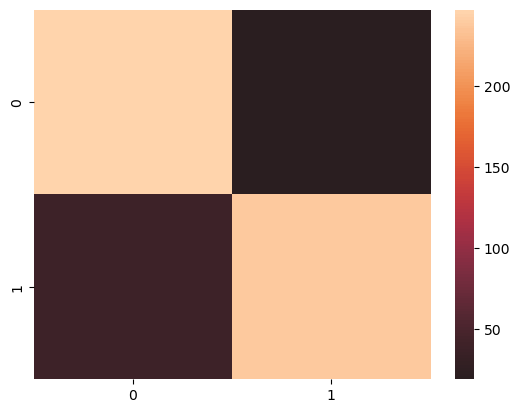

In [38]:
# Importing Libraries
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
# calculate train score
print('DecisionTreeClassifier Train Score: ' , model.score(x_train, y_train))
# calculate test score
print('DecisionTreeClassifier Test Score: ' , model.score(x_test, y_test))
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred));
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , conf_mat);
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

# KNN 

KNeighborsClassifier Train Score:  0.7636135326362561
KNeighborsClassifier Test Score:  0.7642725598526704
Accuracy Score: 0.7642725598526704
Recall Socer: 0.7654447490567574
Precision scoer: 0.7682921810699588
F1 score: 0.7638488719760805
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       266
           1       0.81      0.71      0.75       277

    accuracy                           0.76       543
   macro avg       0.77      0.77      0.76       543
weighted avg       0.77      0.76      0.76       543

Confusion Matrix: 
 [[219  47]
 [ 81 196]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


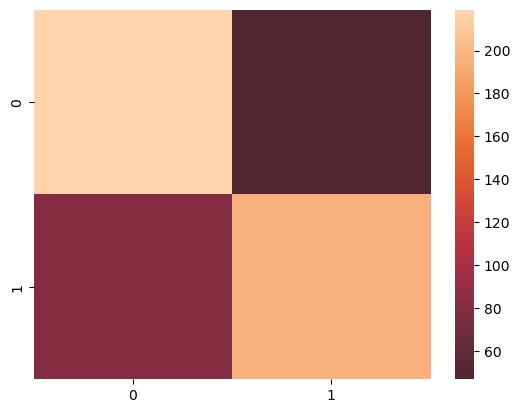

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
# calculate train score
print('KNeighborsClassifier Train Score: ' , knn.score(x_train, y_train))
# calculate test score
print('KNeighborsClassifier Test Score: ' , knn.score(x_test, y_test))
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred))
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , conf_mat);
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

# Random Forest Classifier

RandomForestClassifier Train Score:  0.9832653159788463
RandomForestClassifier Test Score:  0.860036832412523
Accuracy Score: 0.860036832412523
Recall Socer: 0.8616215629326023
Precision scoer: 0.868891042503115
F1 score: 0.8595179738562091
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       266
           1       0.93      0.78      0.85       277

    accuracy                           0.86       543
   macro avg       0.87      0.86      0.86       543
weighted avg       0.87      0.86      0.86       543

Confusion Matrix: 
 [[250  16]
 [ 60 217]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


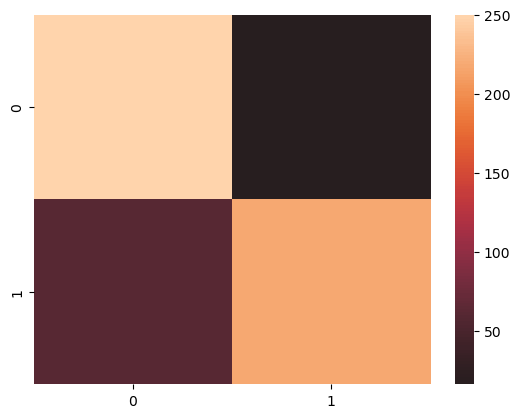

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
# calculate train score
print('RandomForestClassifier Train Score: ' , rfc.score(x_train, y_train))
# calculate test score
print('RandomForestClassifier Test Score: ' , rfc.score(x_test, y_test))
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred))
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , conf_mat);
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

# Naive Bayes

Accuracy Score: 0.5377532228360957
Recall Socer: 0.5336445807659944
Precision scoer: 0.5403076322721212
F1 score: 0.5156489322762117
Classification report:                precision    recall  f1-score   support

           0       0.55      0.33      0.41       266
           1       0.53      0.74      0.62       277

    accuracy                           0.54       543
   macro avg       0.54      0.53      0.52       543
weighted avg       0.54      0.54      0.52       543

Confusion Matrix: 
 [[ 88 178]
 [ 73 204]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


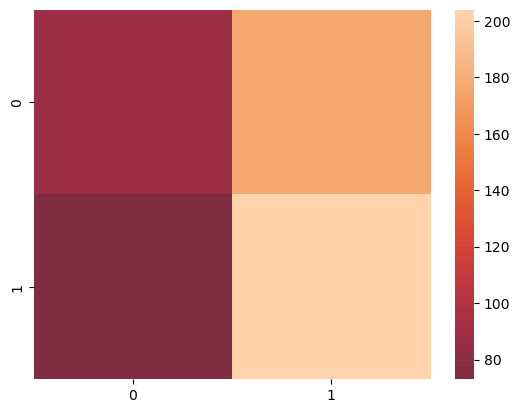

In [41]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()

#prediction from x_test
y_pred = gnb.fit(x_train, y_train).predict(x_test)
#Accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
#Recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
#Precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
#f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
print("Classification report: " , classification_report(y_test , y_pred));
#Confusion matrix
matrix = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , matrix);
#Draw confusion matrix from heatmap
sns.heatmap(matrix, center = True)
plt.show();

# Logistics Regression 

Logistic Regression train Score:  0.5534278331844196
Logistic Regression test Score:  0.5340699815837937
Accuracy Score: 0.5340699815837937
Recall Socer: 0.53645395076138
Precision scoer: 0.5385476463834673
F1 score: 0.5286927286138223
Classification report:                precision    recall  f1-score   support

           0       0.52      0.65      0.58       266
           1       0.56      0.42      0.48       277

    accuracy                           0.53       543
   macro avg       0.54      0.54      0.53       543
weighted avg       0.54      0.53      0.53       543

Confusion Matrix: 
 [[250  16]
 [ 60 217]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


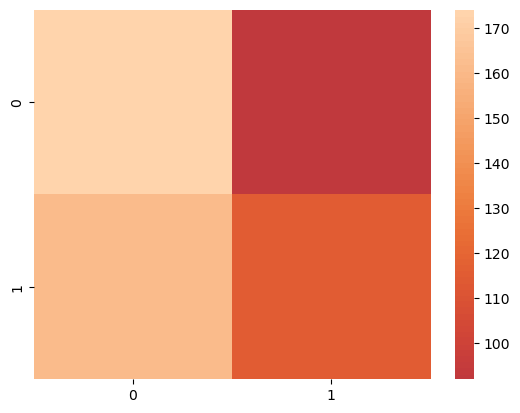

In [42]:
from sklearn.linear_model import LogisticRegression

logisitc_variable = LogisticRegression(C=10,penalty='l2',max_iter=2000)
logisitc_variable.fit(x_train, y_train)

#Calculating train score and test score
print('Logistic Regression train Score: ' , logisitc_variable.score(x_train, y_train))
print('Logistic Regression test Score: ' , logisitc_variable.score(x_test, y_test))

#prediction from x_test
y_pred = logisitc_variable.predict(x_test)
#Accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
#Recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
#Precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
#f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
print("Classification report: " , classification_report(y_test , y_pred));
#Confusion matrix
matrix = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , conf_mat);
#Draw confusion matrix from heatmap
sns.heatmap(matrix, center = True)
plt.show();

# SVC

c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC Train Score:  0.5110236410615537
SVC Test Score:  0.5340699815837937
Accuracy Score: 0.5340699815837937
Recall Socer: 0.5328709861295838
Precision scoer: 0.5333351684650958
F1 score: 0.5317768954175968
Classification report:                precision    recall  f1-score   support

           0       0.53      0.47      0.50       266
           1       0.54      0.59      0.56       277

    accuracy                           0.53       543
   macro avg       0.53      0.53      0.53       543
weighted avg       0.53      0.53      0.53       543

Confusion Matrix: 
 [[250  16]
 [ 60 217]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


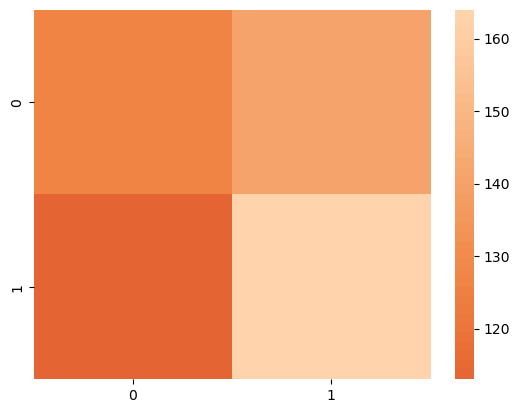

In [45]:
from sklearn.svm import SVC

svc_variable = SVC(kernel = 'linear' , max_iter = 200)
svc_variable.fit(x_train, y_train)

print('SVC Train Score: ' , svc_variable.score(x_train, y_train))
print('SVC Test Score: ' , svc_variable.score(x_test, y_test))

#prediction from x_test
y_pred = svc_variable.predict(x_test)
#Accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
#Recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
#Precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
#f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
print("Classification report: " , classification_report(y_test , y_pred));
#Confusion matrix
matrix = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , conf_mat);
#Draw confusion matrix from heatmap
sns.heatmap(matrix, center = True)
plt.show();

# LinearSVC

Accuracy Score: 0.5230202578268877
Recall Socer: 0.5166662142721424
Precision scoer: 0.5275077281483804
F1 score: 0.4670276989309251
Classification report:
               precision    recall  f1-score   support

           0       0.53      0.20      0.29       266
           1       0.52      0.83      0.64       277

    accuracy                           0.52       543
   macro avg       0.53      0.52      0.47       543
weighted avg       0.53      0.52      0.47       543

Confusion Matrix: 
 [[ 54 212]
 [ 47 230]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  war

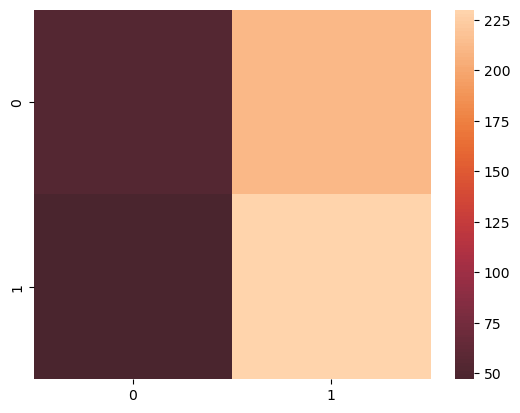

In [38]:
# applying svm
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_model.fit(x_train , y_train)
y_pred = svc_model.predict(x_test)
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred));
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , conf_mat);
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();

# BernoulliNB

Accuracy Score: 0.5046040515653776
Recall Socer: 0.5040647648000869
Precision scoer: 0.5040747190552638
F1 score: 0.5039310712551239
Classification report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       266
           1       0.51      0.53      0.52       277

    accuracy                           0.50       543
   macro avg       0.50      0.50      0.50       543
weighted avg       0.50      0.50      0.50       543

Confusion Matrix: 
 [[127 139]
 [130 147]]


c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\fathy\anaconda3\ana 3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


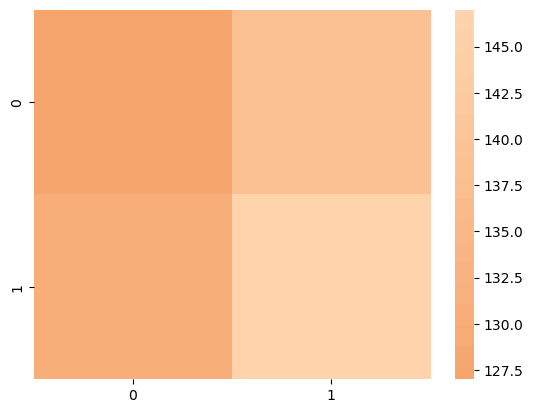

In [39]:
#applying bernolli naive bais
from sklearn.naive_bayes import BernoulliNB
Bnm_model = BernoulliNB()
Bnm_model.fit(x_train , y_train)
y_pred = Bnm_model.predict(x_test)
# show accuracy score
print("Accuracy Score:" , accuracy_score(y_test , y_pred))
# show recall score
print("Recall Socer:" , recall_score(y_test , y_pred , pos_label='positive' , average='macro'))
# show precision score
print("Precision scoer:" , precision_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show f1 score
print("F1 score:" , f1_score(y_test , y_pred,pos_label='positive' , average='macro'))
# show classification report
print("Classification report:\n" , classification_report(y_test , y_pred));
# show the confusion matrix
conf_mat = confusion_matrix(y_test , y_pred)
print("Confusion Matrix: \n" , conf_mat);
# drawing confusion matrix
sns.heatmap(conf_mat, center = True)
plt.show();